## Описание алгоритма

Алгоритм поиска кукушки может быть применен к широкому кругу задач оптимизации.

Алгоритм оптимизации с кукушкой (COA) используется для непрерывной нелинейной оптимизации.

Аналогично другим эволюционным подходам, COA начинается с исходной популяции. Основой алгоритма является стремление к выживанию. В процессе борьбы за выживание некоторые особи погибают. Выжившие кукушки мигрируют в более благоприятные места, где начинают размножаться и откладывать яйца. В конечном итоге выжившие кукушки сходятся таким образом, что формируется общество кукушек с сходными значениями приспособленности.

Резюмируя:
1. Каждая кукушка можеот откладывать одно яйцо за раз.
2. Лучшие гнезда с качественными яйцами передадутся будущим поколениям.
3. Фиксированное количество доступных гнезд.

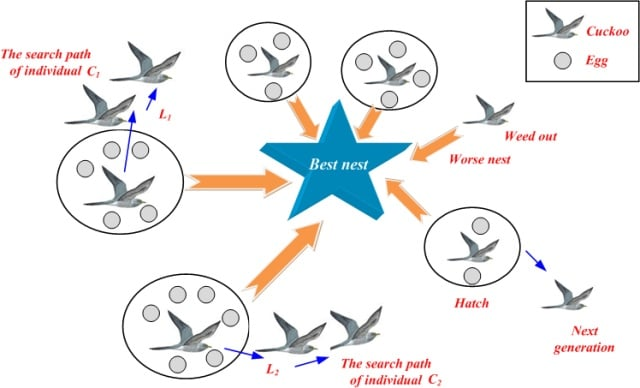

состояния для алгоритма:
1. Каждая кукушка откладывает по одному яйцу и сбрасывает его в случайно выбранное гнездо.
2. Лучшие гнезда с высоким качеством яиц будут переданы следующим поколениям.
3. Количество доступных гнезд фиксировано, и гнездо может обнаружить чужеродное яйцо с вероятностью pa. В этом случае птица - хозяин может либо выбросить яйцо, либо покинуть гнездо и яйцо погибнет.

### Cuckoo Search Algorithm:

Для каждой итерации g случайным образом выбирается яйцо кукушки i

 и генерируются новые решения `xi (g+ 1)`
с использованием полета Леви, своего рода случайного блуждания, в котором шаги определяются в границах длин шагов, которые имеют определенное распределение вероятностей, причем направления шагов изотропны и случайны.


### Псевдокод алгоритма COA

1. Инициализация кукушек случайными значениями.
2. Определение приспособленности.
3. Кладка яиц в случайные гнёзда.
4. Опустошить гнездо с заданной вероятностью
5. Отправить кукушек от текущего положения в случайную сторону на расстояние полёта Леви
6. Определение приспособленности.
7. Кладка яиц в случайные гнёзда.
8. Опустошить гнездо с заданной вероятностью.
9. Повторить п.5 до выполнения критерия останова.

```
init f(x), X = f(x1, x2, x3);

while iterations:
    Get cuckoo randomly by Levy flights;
    Evaluate its quality fitness Fi;
    Choose a nest among n randomly;
    
    if Fi > Fj then:
      replace j by the new solution;
    end

    if A fraction (Pa) of worse nets are abandoned and new ones are built then
      Keep the best solutions
      Rank the solutions and find the current best
    end
end
```

Основные параметры алгоритма:

n: количество гнезд $X_i (i=1,2,3,4...n)$

$P_a$: вероятность нахождения яиц принесенных кукушкой и уничтожения их птицей-хозяином
Птица-хозяин обнаруживает яйцо кукушки с вероятностью $P_a  \in (0, 1)$

_Maxt_: Максимальное количество итераций

Based on three rules the cuckoo nest _i_, new generating solution for t iteration is given as:

$x^{t+1}_i = x^t_i + a Ø Levy (λ)$

Где:
(i=1,2,3,4...n)

$a$ - величина шага

λ - компонент Levy

Ø - entry wise multiplication

Levy Flight = Random Walk


### Levy Flights

Вероятностное распространение животных

$Levy(λ) = t^{-(λ)}$



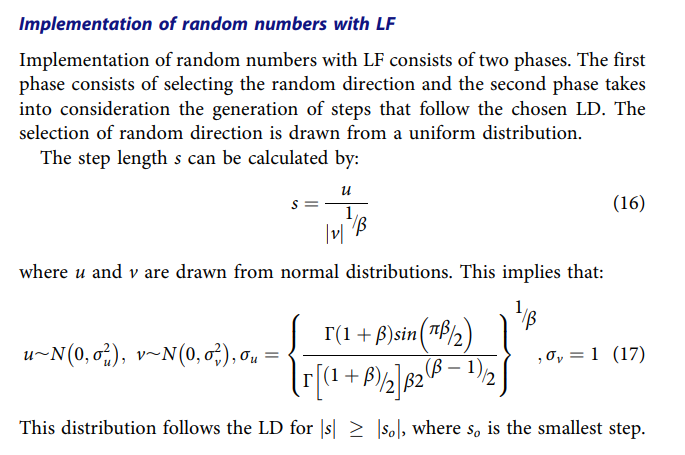

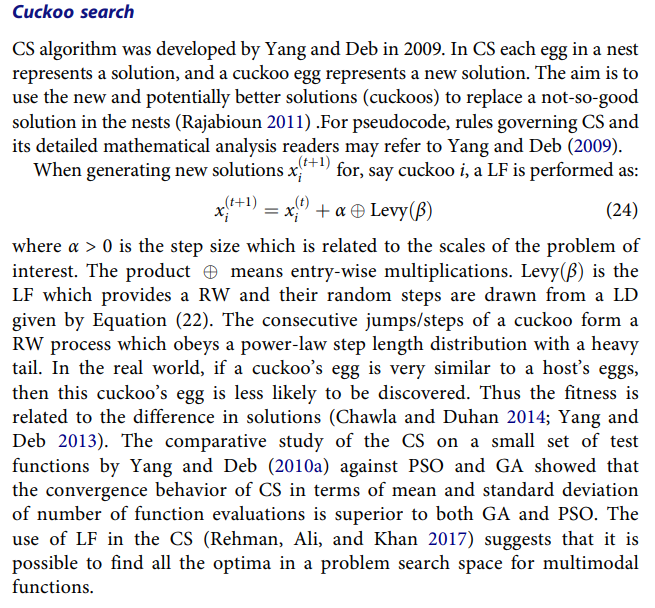

---
## Функции для оптимизации

In [169]:
import math
import numpy as np
import pandas as pd
import networkx as nx

import random
import datetime


import plotly.graph_objects as go

### Функция Химмельблау

$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7 )^2$

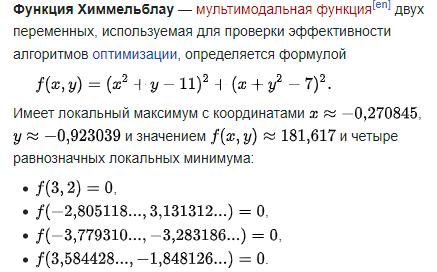

In [170]:
def fitness_Himmelblau(xy):
    x = xy[0]
    y = xy[1]

    return ((x**2 + y - 11) ** 2) + (((x + y**2 - 7) ** 2))

### Функция Растригина

$f(x) = An + \sum_{i+1}^n[x^2_i - A cos(2πx_i)]$
где A = 10

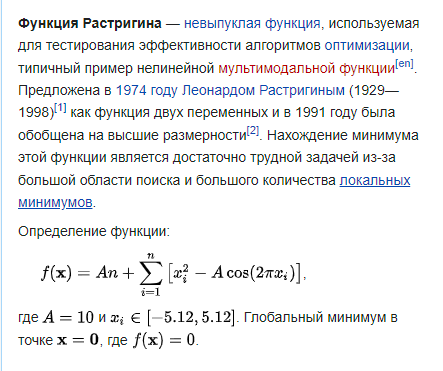

In [171]:
def fitness_Rastrigin(X):
    A = 10
    return A + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

### Функция Розенброка

$f(x) = \sum_{i=1}^{n-1}[100(x_{i+1}-x^2_i)^2+(x_i-1)^2]$

In [172]:
def fitness_Rosenbrok(x):
    return np.sum(100.0 * (x[1:] - x[:-1] ** 2.0) ** 2.0 + (1 - x[:-1]) ** 2.0, axis=0)

### Функция "подставка для яиц" (Eggholder function)

$f(x,y) = -(y + 47)sin \sqrt{|\frac{x}{2} + (y + 47)|} - xsin\sqrt{|x - (y + 47)|} $

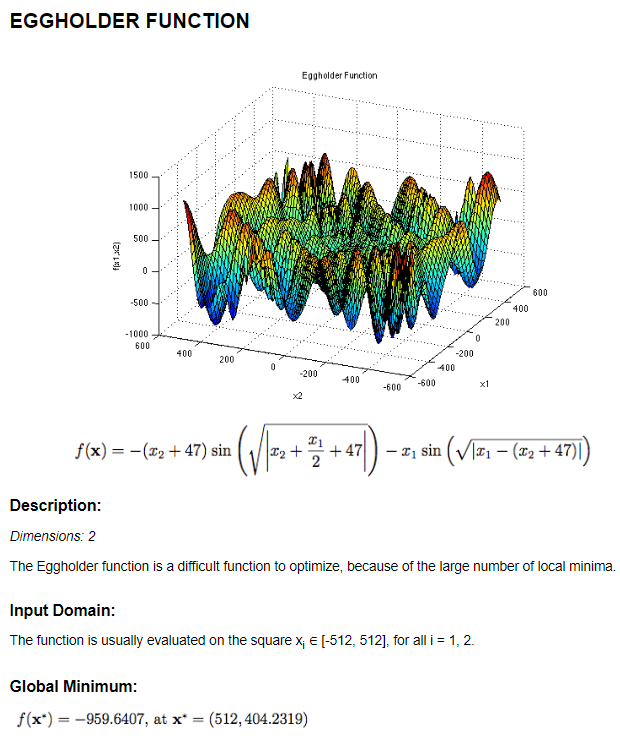

In [173]:
def fitness_eggholder(xy):
    x = xy[0]
    y = xy[1]

    a = math.sqrt(abs(y + x / 2 + 47))
    b = math.sqrt(abs(x - (y + 47)))
    c = -(y + 47) * math.sin(a) - x * math.sin(b)
    return c

---
## Реализация алгоритма

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from math import gamma


class CSO:

    def __init__(
        self,
        fitness,
        function_name: str,
        P=150,
        pa=0.25,
        beta=1.5,
        n=2,
        bound=None,
        Tmax=300,
        find_min=True,
        plot=False,
        verbose=False,
    ):
        """

        PARAMETERS:

        fitness: A FUNCTION WHICH EVALUATES COST (OR THE FITNESS) VALUE

        P: POPULATION SIZE

        n: TOTAL DIMENSIONS

        pa: ASSIGNED PROBABILITY

        beta: LEVY PARAMETER

        bound: AXIS BOUND FOR EACH DIMENSION

        X: PARTICLE POSITION OF SHAPE (P,n)

        ################ EXAMPLE #####################

        If ith egg Xi = [x,y,z], n = 3, and if
        bound = [(-5,5),(-1,1),(0,5)]
        Then, x∈(-5,5); y∈(-1,1); z∈(0,5)

        ##############################################

        Tmax: MAXIMUM ITERATION

        best: GLOBAL BEST POSITION OF SHAPE (n,1)

        """
        self.fitness = fitness
        self.function_name = function_name

        self.P = P
        self.pa = pa
        self.beta = beta

        self.n = n
        self.bound = bound
        self.Tmax = Tmax

        self.min = find_min
        self.plot = plot
        self.verbose = verbose

        # X = (U-L)*rand + L (U AND L ARE UPPER AND LOWER BOUND OF X)
        # U AND L VARY BASED ON THE DIFFERENT DIMENSION OF X

        self.X = []

        if bound is not None:
            for U, L in bound:
                x = (U - L) * np.random.rand(P) + L
                self.X.append(x)
            self.X = np.array(self.X).T
        else:
            self.X = np.random.randn(P, n)

    def flight(self):
        """

        ACTION:

        TO CALCULATE THE CHANGE OF POSITION 'X = X + rand*C' USING LEVY FLIGHT METHOD

        C = 0.01*S*(X-best) WHERE S IS THE RANDOM STEP, and β = beta (TAKEN FROM [1])

              u
        S = -----
                1/β
             |v|

        beta = 1.5

        u ~ N(0,σu) # NORMAL DISTRIBUTION WITH ZERO MEAN AND 'σu' STANDARD DEVIATION

        v ~ N(0,σv) # NORMAL DISTRIBUTION WITH ZERO MEAN AND 'σv' STANDARD DEVIATION

        σv = 1

                     Γ(1+β)*sin(πβ/2)
        σu^β = --------------------------
                   Γ((1+β)/2)*β*(2^((β-1)/2))

        Γ IS THE GAMMA FUNCTION

        """

        num = gamma(1 + self.beta) * np.sin(np.pi * self.beta / 2)
        den = gamma((1 + self.beta) / 2) * self.beta * (2 ** ((self.beta - 1) / 2))

        sigma_u = (num / den) ** (1 / self.beta)
        sigma_v = 1

        u = np.random.normal(0, sigma_u, self.n)
        v = np.random.normal(0, sigma_v, self.n)

        S = u / (np.abs(v) ** (1 / self.beta))

        # DEFINING GLOBAL BEST SOLUTION BASED ON FITNESS VALUE

        for i in range(self.P):
            if i == 0:
                self.best = self.X[i, :].copy()
            else:
                self.best = self.optimum(self.best, self.X[i, :])

        Xnew = self.X.copy()
        for i in range(self.P):
            Xnew[i, :] += np.random.randn(self.n) * 0.01 * S * (Xnew[i, :] - self.best)
            self.X[i, :] = self.optimum(Xnew[i, :], self.X[i, :])

    def layEggs(self):
        """

        ACTION:

        TO REPLACE SOME NEST WITH NEW SOLUTIONS

        HOST BIRD CAN THROW EGG AWAY (ABANDON THE NEST) WITH FRACTION

        pa ∈ [0,1] (ALSO CALLED ASSIGNED PROBABILITY) AND BUILD A COMPLETELY

        NEW NEST. FIRST WE CHOOSE A RANDOM NUMBER r ∈ [0,1] AND IF r < pa,

        THEN 'X' IS SELECTED AND MODIFIED ELSE IT IS KEPT AS IT IS.

        """

        Xnew = self.X.copy()
        Xold = self.X.copy()
        for i in range(self.P):
            d1, d2 = np.random.randint(0, 5, 2)
            for j in range(self.n):
                r = np.random.rand()
                if r < self.pa:
                    Xnew[i, j] += np.random.rand() * (Xold[d1, j] - Xold[d2, j])
            self.X[i, :] = self.optimum(Xnew[i, :], self.X[i, :])

    def optimum(self, best, particle_x):
        """

        PARAMETERS:

        best: GLOBAL BEST SOLUTION 'best'

        particle_x: PARTICLE POSITION

        ACTION:

        COMPARE PARTICLE'S CURRENT POSITION WITH GLOBAL BEST POSITION

            1. IF PROBLEM IS MINIMIZATION (min=TRUE), THEN CHECKS WHETHER FITNESS VALUE OF 'best'

            IS LESS THAN THE FITNESS VALUE OF 'particle_x' AND IF IT IS GREATER, THEN IT

            SUBSTITUTES THE CURRENT PARTICLE POSITION AS THE BEST (GLOBAL) SOLUTION

            2. IF PROBLEM IS MAXIMIZATION (min=FALSE), THEN CHECKS WHETHER FITNESS VALUE OF 'best'

            IS GREATER THAN THE FITNESS VALUE OF 'particle_x' AND IF IT IS LESS, THEN IT

            SUBSTITUTES THE CURRENT PARTICLE POSITION AS THE BEST (GLOBAL) SOLUTION

        """

        if self.min:
            if self.fitness(best) > self.fitness(particle_x):
                best = particle_x.copy()
        else:
            if self.fitness(best) < self.fitness(particle_x):
                best = particle_x.copy()
        return best

    def clip_X(self):

        # IF BOUND IS SPECIFIED THEN CLIP 'X' VALUES SO THAT THEY ARE IN THE SPECIFIED RANGE

        if self.bound is not None:
            for i in range(self.n):
                xmin, xmax = self.bound[i]
                self.X[:, i] = np.clip(self.X[:, i], xmin, xmax)

    def execute(self):
        """

        PARAMETERS:

        t: ITERATION NUMBER

        fitness_time: LIST STORING FITNESS (OR COST) VALUE FOR EACH ITERATION

        time: LIST STORING ITERATION NUMBER ([0,1,2,...])

        ACTION:

        AS THE NAME SUGGESTS, THIS FUNCTION EXECUTES CUCKOO SEARCH ALGORITHM

        BASED ON THE TYPE OF PROBLEM (MAXIMIZATION OR MINIMIZATION).

        NOTE: THIS FUNCTION PRINTS THE GLOBAL FITNESS VALUE FOR EACH ITERATION

        IF THE VERBOSE IS TRUE

        """

        self.fitness_time, self.time = [], []

        for t in range(self.Tmax):
            self.flight()
            self.clip_X()
            self.layEggs()
            self.clip_X()
            self.fitness_time.append(self.fitness(self.best))
            self.time.append(t)
            # TODO: условие остановки
            if self.verbose:
                print(
                    "Iteration:  ",
                    t,
                    "| best global fitness (cost):",
                    round(self.fitness(self.best), 7),
                )

        if self.verbose:
            print(
                "\nOPTIMUM SOLUTION\n  >", np.round(self.best.reshape(-1), 7).tolist()
            )
            print("\nOPTIMUM FITNESS\n  >", np.round(self.fitness(self.best), 7))
            print()
        if self.plot:
            self.Fplot()

        return np.round(self.best.reshape(-1), 7).tolist(), np.round(
            self.fitness(self.best), 7
        )

    def Fplot(self):
        colors = ["salmon", "crimson", "#F00", "#0F0", "#00F", "#fac998"]
        color = random.choice(colors)

        fig = go.Figure(
            data=go.Scatter(
                x=self.time,
                y=self.fitness_time,
                mode="lines+markers",
                marker_color=color,
            )
        )
        fig.update_layout(
            title=f"<b>Fitness value vs Iteration ({self.function_name})<b>;\n"
            + f"p = {self.P}, pa = {self.pa}, beta = {self.beta}",
            xaxis_title="Iteration",
            yaxis_title="Fitness value",
            showlegend=False,
            template="plotly_dark",
        )
        fig.show()

---
## Проверка алгоритма на разных функциях

### Запуск алгоритма с разными гиперпараметрами для оптимизации функции Химмельблау

In [179]:
s = CSO(
    fitness_Himmelblau,
    function_name="Функция Химмельблау",
    P=150,
    n=2,
    pa=0.25,
    beta=1.2,
    bound=None,
    plot=True,
    find_min=True,
    verbose=False,
    Tmax=50,
)
solution1, fitness1 = s.execute()

s = CSO(
    fitness_Himmelblau,
    function_name="Функция Химмельблау",
    P=250,
    n=2,
    pa=0.25,
    beta=1.5,
    bound=None,
    plot=True,
    find_min=True,
    verbose=False,
    Tmax=50,
)
solution2, fitness2 = s.execute()

print(solution1, fitness1)
print(solution2, fitness2)

[3.0017603, 1.996465] 0.0002024
[3.5834467, -1.8491162] 7.16e-05


### Запуск алгоритма с разными гиперпараметрами для оптимизации функции Растригина

In [180]:
# ----------------------------------------------------------------
params1 = {'P': 250, 'pa': 0.25, 'beta': 1.5}
s = CSO(
    fitness_Rastrigin,
    function_name="Функция Растригина",
    n=1,
    bound=None,
    plot=True,
    find_min=True,
    verbose=False,
    **params1,
    Tmax=300,
)
solution1, fitness1 = s.execute()

print(params1)
print(solution1, fitness1)

# ----------------------------------------------------------------
params2 = {'P': 150, 'pa': 0.25, 'beta': 1.5}
s = CSO(
    fitness_Rastrigin,
    function_name="Функция Растригина",
    n=1,
    bound=None,
    plot=True,
    find_min=True,
    verbose=False,
    **params2,
    Tmax=300,
)
solution2, fitness2 = s.execute()

print(params2)
print(solution2, fitness2)

# ----------------------------------------------------------------
params3 = {'P': 150, 'pa': 0.45, 'beta': 1.5}
s = CSO(
    fitness_Rastrigin,
    function_name="Функция Растригина",
    n=1,
    bound=None,
    plot=True,
    find_min=True,
    verbose=False,
    **params3,
    Tmax=300,
)
solution3, fitness3 = s.execute()

print(params3)
print(solution3, fitness3)

{'P': 250, 'pa': 0.25, 'beta': 1.5}
[1.7e-06] 0.0


{'P': 150, 'pa': 0.25, 'beta': 1.5}
[1.2e-06] 0.0


{'P': 150, 'pa': 0.45, 'beta': 1.5}
[-0.0] 0.0


### Запуск алгоритма с разными гиперпараметрами для оптимизации функции Розенброка

In [181]:
params1 = {'P': 250, 'pa': 0.25, 'beta': 1.5}

# ----------------------------------------------------------------
s = CSO(
    fitness_Rosenbrok,
    function_name="Функция Розенброка",
    n=2,
    bound=None,
    plot=True,
    find_min=True,
    verbose=False,
    **params1,
    Tmax=300,
)
solution1, fitness1 = s.execute()
print(params1)
print(solution1, fitness1)

# ----------------------------------------------------------------
params2 = {'P': 150, 'pa': 0.25, 'beta': 1.5}

s = CSO(
    fitness_Rosenbrok,
    function_name="Функция Розенброка",
    n=2,
    bound=None,
    plot=True,
    find_min=True,
    verbose=False,
    **params2,
    Tmax=300,
)
solution2, fitness2 = s.execute()
print(params2)
print(solution2, fitness2)

# ----------------------------------------------------------------
params3 = {'P': 150, 'pa': 0.45, 'beta': 1.5}

s = CSO(
    fitness_Rosenbrok,
    function_name="Функция Розенброка",
    n=2,
    bound=None,
    plot=True,
    find_min=True,
    verbose=False,
    **params3,
    Tmax=300,
)
solution3, fitness3 = s.execute()
print(params3)
print(solution3, fitness3)


{'P': 250, 'pa': 0.25, 'beta': 1.5}
[1.0051602, 1.0106027] 3.32e-05


{'P': 150, 'pa': 0.25, 'beta': 1.5}
[1.0025028, 1.0057969] 6.79e-05


{'P': 150, 'pa': 0.45, 'beta': 1.5}
[0.9969788, 0.9940015] 9.2e-06


### Запуск алгоритма с разными гиперпараметрами для оптимизации функции eggholder

In [183]:
params1 = {'P': 150, 'pa': 0.25, 'beta': 1.5}
s = CSO(
    fitness_eggholder,
    function_name='Функция "Подставка для яиц"',
    n=2,
    bound=None,
    plot=True,
    find_min=True,
    verbose=False,
    **params1,
    Tmax=300,
)
solution1, fitness1 = s.execute()

print(params1)
print(solution1, fitness1)

params2 = {'P': 150, 'pa': 0.35, 'beta': 1.5}
s = CSO(
    fitness_eggholder,
    function_name='Функция "Подставка для яиц"',
    n=2,
    bound=[(-512, 512), (-512, 512)],
    plot=True,
    find_min=True,
    verbose=False,
    **params2,
    Tmax=300,
)

solution2, fitness2 = s.execute()

print(params2)
print(solution2, fitness2)


params3 = {'P': 150, 'pa': 0.5, 'beta': 1.5}
s = CSO(
    fitness_eggholder,
    function_name='Функция "Подставка для яиц"',
    n=2,
    bound=[(-512, 512), (-512, 512)],
    plot=True,
    find_min=True,
    verbose=False,
    **params3,
    Tmax=300,
)

solution3, fitness3 = s.execute()

print(params3)
print(solution3, fitness3)



{'P': 150, 'pa': 0.25, 'beta': 1.5}
[-15.6805204, 28.2134812] -72.2528537


{'P': 150, 'pa': 0.35, 'beta': 1.5}
[511.9998216, 402.4874087] -956.224196


{'P': 150, 'pa': 0.5, 'beta': 1.5}
[512.0, 404.85706] -959.19442
